In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## Now import all the model libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
data=pd.read_csv("data/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data["avg_score"]=round((data["math score"]+data["reading score"]+data["writing score"])/3,0)

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


#### Devide data x and y(target and featues)

In [6]:
x=data.drop("avg_score",axis=1)

In [7]:
cat_features=x.select_dtypes("object").columns
numeric_features=x.select_dtypes(["int","float"]).columns

In [8]:
y=data["avg_score"]
y

0      73.0
1      82.0
2      93.0
3      49.0
4      76.0
       ... 
995    94.0
996    57.0
997    65.0
998    74.0
999    83.0
Name: avg_score, Length: 1000, dtype: float64

In [9]:
numeric_features

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [10]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [11]:
num_scaler=StandardScaler()
cat_encoder=OneHotEncoder()

### Use of ColumnTrasnformer
1. apply the onehot encoding on all the categorical featues.
2. apply the standard scaler on the all numeric features

In [12]:
transformer=ColumnTransformer([("cat",cat_encoder,cat_features),
                              ("num",num_scaler,numeric_features)])

In [13]:
x=transformer.fit_transform(x)

In [14]:
x.shape

(1000, 20)

In [15]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]])

In [16]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.390024,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.192076,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.577711,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.259543,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.445746,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.269803,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.467751,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.126093,0.605158,0.589015


#### now split the data into train_test_split

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
print(x_train.shape)
x_test.shape

(670, 20)


(330, 20)

In [20]:
print(y_train.shape)
y_test.shape

(670,)


(330,)

### Create a Function for the evaluate the model

In [21]:
##for check all the results
def evaluate(true,predicted):
    r2_square=r2_score(true,predicted)
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    return r2_square,mae,mse,rmse
    

In [22]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K Neighbour":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XgBoost":XGBRegressor(),
    "CatBoost":CatBoostRegressor()
}

In [23]:
list(models.values())[0]

LinearRegression()

In [24]:
model_list=[]
r2_score_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    #train the model
    model.fit(x_train,y_train)
    
    #now make the prediction using the models
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #now evalutate all the score using our predefined function
    train_r2_square,train_mae,train_mse,train_rmse=evaluate(y_train,y_train_pred)
    test_r2_square,test_mae,test_mse,test_rmse=evaluate(y_test,y_test_pred)
    
    model_list.append(list(models.values())[i])
    r2_score_list.append(test_r2_square)
    
    print(f"Model: {list(models.values())[i]}")
    print(":::Statistics for Training ::::")
    print(f"R2_score for the training: {train_r2_square}")
    print(f"Mean Absluate Error for Training : {train_mae}")
    print(f"Mean Sqaured Error for Training : {train_mse}")
    print(f" Root Mean Squared Error for Training: {train_rmse}")
    print("#"*40)
    print("#"*40)
    
    print(f"Model: {list(models.values())[i]}")
    print(":::Statistics for Testing ::::")
    print(f"R2_score for the Testing: {test_r2_square}")
    print(f"Mean Absluate Error for Testing : {test_mae}")
    print(f"Mean Sqaured Error for Testing : {test_mse}")
    print(f" Root Mean Squared Error for Testing: {test_rmse}")
    print("#"*40)
    print("#"*40)
    
    
    

Model: LinearRegression()
:::Statistics for Training ::::
R2_score for the training: 0.9996172212648691
Mean Absluate Error for Training : 0.23410097947761194
Mean Sqaured Error for Training : 0.073841015260611
 Root Mean Squared Error for Training: 0.2717370332888232
########################################
########################################
Model: LinearRegression()
:::Statistics for Testing ::::
R2_score for the Testing: 0.9996792992435007
Mean Absluate Error for Testing : 0.22086292613636363
Mean Sqaured Error for Testing : 0.07121583187218869
 Root Mean Squared Error for Testing: 0.2668629458583351
########################################
########################################
Model: Lasso()
:::Statistics for Training ::::
R2_score for the training: 0.9935544256415019
Mean Absluate Error for Training : 0.8855580723424078
Mean Sqaured Error for Training : 1.2434017642240442
 Root Mean Squared Error for Training: 1.1150792636508151
########################################
##

In [25]:
r2_score_list

[0.9996792992435007,
 0.9935831193916681,
 0.9996795466937833,
 0.9591189248206186,
 0.9826284769666358,
 0.9923879719126262,
 0.9953762551841093,
 0.9920805339390157]

In [26]:
Result=pd.DataFrame(list(zip(model_list,r2_score_list)),columns=["Model Name","R2_Score"]).sort_values("R2_Score",ascending=False)

In [27]:
Result

,Model Name,R2_Score
2,Ridge(),0.999680
0,LinearRegression(),0.999679
6,"XGBRegressor(base_score=None, booster=None, ca...",0.995376
1,Lasso(),0.993583
5,"(DecisionTreeRegressor(max_features=1.0, rando...",0.992388
7,<catboost.core.CatBoostRegressor object at 0x0...,0.992081
4,DecisionTreeRegressor(),0.982628
3,KNeighborsRegressor(),0.959119


####  AS we can see here there are some model are perfoming very good so we are taking LinearRegression


In [28]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
model.score(x_train,y_train)

0.9996172212648691

In [30]:
model.score(x_test,y_test)

0.9996792992435007

In [31]:
y_pred=model.predict(x_test)

Text(0, 0.5, 'Predicted')

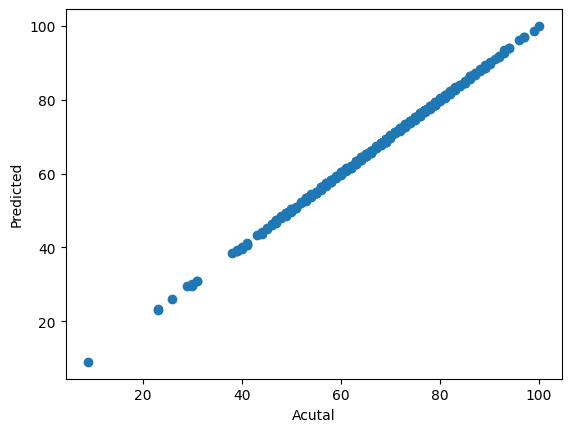

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel("Acutal")
plt.ylabel("Predicted")

<Axes: xlabel='avg_score'>

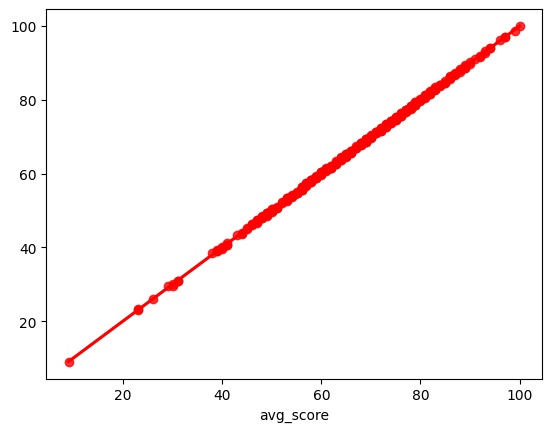

In [33]:
sns.regplot(x=y_test,y=y_pred,color="red")

In [34]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Difference":y_test-y_pred})

,Actual,Predicted,Difference
521,87.0,87.001953,-0.001953
737,64.0,63.958984,0.041016
740,75.0,75.060547,-0.060547
660,75.0,74.570312,0.429688
411,82.0,81.589844,0.410156
...,...,...,...
506,68.0,68.007812,-0.007812
342,73.0,73.091797,-0.091797
485,72.0,71.675781,0.324219
711,83.0,83.253906,-0.253906


In [35]:
for i in list(models.values()):
    print(i)

LinearRegression()
Lasso()
Ridge()
KNeighborsRegressor()
DecisionTreeRegressor()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [36]:
models

{'Linear Regression': LinearRegression(),
 'Lasso': Lasso(),
 'Ridge': Ridge(),
 'K Neighbour': KNeighborsRegressor(),
 'Decision Tree': DecisionTreeRegressor(),
 'Random Forest': RandomForestRegressor(),
 'XgBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'CatBoost': <catboost.core.Cat

In [37]:
models_params={"regression_params":{},
    "lasso_params" : {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]},
"ridge_params" :{'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]},
"K_neighbours_params":{"n_neighbors":[2,5,8,10],
                     "weights":["uniform", "distance"],
                    "algorithm":["auto","kd_tree","ball_tree"]},
"Decision_regressor_params":{
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter":["best","random"],
    "max_depth":[2,4,7],
    "min_samples_split":[2,4,6,8,10]},
"RandomForestRegressor_params":{
    "n_estimators":[25, 50, 100, 150],
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth":[2,4,7],
    "min_samples_split":[2,4,6,8,10]
},
"XGBRegressor_params":{
    "max_depth":[3,5,9,7,10],
    "gamma":[0.1,0.2,0.3],
    "colsample_bytree":[0.5,0.6,0.7,0.8,0.9]
}}

In [38]:
print(models_params.values())

dict_values([{}, {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}, {'alpha': [200, 230, 250, 265, 270, 275, 290, 300, 500]}, {'n_neighbors': [2, 5, 8, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'kd_tree', 'ball_tree']}, {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random'], 'max_depth': [2, 4, 7], 'min_samples_split': [2, 4, 6, 8, 10]}, {'n_estimators': [25, 50, 100, 150], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_depth': [2, 4, 7], 'min_samples_split': [2, 4, 6, 8, 10]}, {'max_depth': [3, 5, 9, 7, 10], 'gamma': [0.1, 0.2, 0.3], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9]}])


In [39]:
def HpyerParameterTuning(model,param,n_jobs,cv,scoring):
    hpt_model=GridSearchCV(model,param,n_jobs=n_jobs,cv=cv)
    hpt_model.fit(x_train,y_train)
    return hpt_model

In [40]:
h_model=[]
for i,j in zip(model_list,models_params.values()):
    n_jobs=5
    cv=3
    scoring="accuracy"
    model=HpyerParameterTuning(i,j,n_jobs,cv,scoring)
    print(model)
    h_model.append(model)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=5, param_grid={})
GridSearchCV(cv=3, estimator=Lasso(), n_jobs=5,
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]})
GridSearchCV(cv=3, estimator=Ridge(), n_jobs=5,
             param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300,
                                   500]})
GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree'],
                         'n_neighbors': [2, 5, 8, 10],
                         'weights': ['uniform', 'distance']})
GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})
GridSearchCV(cv=

In [41]:
h_model

[GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=5, param_grid={}),
 GridSearchCV(cv=3, estimator=Lasso(), n_jobs=5,
              param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}),
 GridSearchCV(cv=3, estimator=Ridge(), n_jobs=5,
              param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300,
                                    500]}),
 GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=5,
              param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree'],
                          'n_neighbors': [2, 5, 8, 10],
                          'weights': ['uniform', 'distance']}),
 GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=5,
              param_grid={'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'max_depth': [2, 4, 7],
                          'min_samples_split': [2, 4, 6, 8, 10],
                          'splitter': ['best', 'random'

In [42]:
for i in h_model:
    print(f"Model : {i.best_estimator_}")
    print(f" The Best Parameter for the model {i.best_params_}")
    print(f" Best Score for the Model after the Hyperparamtertuning is {i.best_score_}")
    print(">>"*30)
    print(">>"*30)

Model : LinearRegression()
 The Best Parameter for the model {}
 Best Score for the Model after the Hyperparamtertuning is 0.9995895714616555
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Model : Lasso(alpha=0.02)
 The Best Parameter for the model {'alpha': 0.02}
 Best Score for the Model after the Hyperparamtertuning is 0.9996001282552879
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Model : Ridge(alpha=200)
 The Best Parameter for the model {'alpha': 200}
 Best Score for the Model after the Hyperparamtertuning is 0.9768747749499326
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Model : KNeighborsRegressor(n_neighbors=10, weights='distance')
 The Best Parameter for the model {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
 Best Score for the Mode

In [43]:
m=[]
s=[]
for i in h_model:
    m.append(i.best_estimator_)
    s.append(i.best_score_)
    

In [44]:
d=pd.DataFrame({"Models":m,"Score":s}).sort_values("Score",ascending=False)

In [45]:
d

,Models,Score
1,Lasso(alpha=0.02),0.999600
0,LinearRegression(),0.999590
6,"XGBRegressor(base_score=None, booster=None, ca...",0.995481
5,"(DecisionTreeRegressor(max_depth=7, max_featur...",0.993492
4,"DecisionTreeRegressor(criterion='poisson', max...",0.979766
2,Ridge(alpha=200),0.976875
3,"KNeighborsRegressor(n_neighbors=10, weights='d...",0.958339


In [46]:
y_pred=h_model[1].predict(x_test)

In [47]:
pd.DataFrame({"Actuals":y_test,"Predicted":y_pred,"Difference":y_pred-y_test})

,Actuals,Predicted,Difference
521,87.0,86.951239,-0.048761
737,64.0,64.026189,0.026189
740,75.0,74.972980,-0.027020
660,75.0,74.643599,-0.356401
411,82.0,81.625440,-0.374560
...,...,...,...
506,68.0,67.988053,-0.011947
342,73.0,72.987374,-0.012626
485,72.0,71.651822,-0.348178
711,83.0,83.304061,0.304061


In [48]:
best_model=h_model[1]
best_model

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=5,
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]})

In [49]:
import pickle

In [50]:
pickle.dump(best_model,open("Model.pkl","wb"))

In [51]:
model=pickle.load(open("Model.pkl","rb"))

In [52]:
model.score(x_train,y_train)

0.9996046662358576

In [53]:
model.predict([[2,3,5,2,5,3,1,1,1,1,1,1,0,0,0,0,0,2.2,1,1]])

array([88.75279834])